In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

import statsmodels.api as sm
import statsmodels.tsa.api as smt
pd.options.display.float_format = '{:.2f}'.format

In [18]:
data = pd.read_csv('avocado.csv')
data = data.drop('Unnamed: 0',axis = 1)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


In [19]:
data.shape

(18249, 13)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [21]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [22]:
df1 = data.copy(deep = True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace = True)
df1 = df1.resample('W').sum()
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Date,,,,,,,,,,
2015-01-04,140.54,84674337.20,33098258.74,36851038.43,2278818.64,12446221.39,9910008.90,2485655.90,50556.59,217620
2015-01-11,148.03,78555807.24,31024164.99,32808429.84,2349167.45,12374044.96,10352936.42,1977832.00,43276.54,217620
2015-01-18,150.24,78388784.08,31802706.86,31662041.93,2208250.55,12715784.74,10548854.11,2145586.13,21344.50,217620
2015-01-25,150.89,76466281.07,32305132.87,28929122.37,2078378.86,13153646.97,10877316.95,2252815.92,23514.10,217620
2015-02-01,134.68,119453235.25,50292988.96,50696230.48,3687489.31,14776526.50,11576833.65,3073989.39,125703.46,217620


In [23]:
df1=df1.sort_values('Date')
df1=df1.drop('year',axis=1)

In [24]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
Date,,,,,,,,,
2015-01-04,140.54,84674337.20,33098258.74,36851038.43,2278818.64,12446221.39,9910008.90,2485655.90,50556.59
2015-01-11,148.03,78555807.24,31024164.99,32808429.84,2349167.45,12374044.96,10352936.42,1977832.00,43276.54
2015-01-18,150.24,78388784.08,31802706.86,31662041.93,2208250.55,12715784.74,10548854.11,2145586.13,21344.50
2015-01-25,150.89,76466281.07,32305132.87,28929122.37,2078378.86,13153646.97,10877316.95,2252815.92,23514.10
2015-02-01,134.68,119453235.25,50292988.96,50696230.48,3687489.31,14776526.50,11576833.65,3073989.39,125703.46


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 169 entries, 2015-01-04 to 2018-03-25
Freq: W-SUN
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  169 non-null    float64
 1   Total Volume  169 non-null    float64
 2   4046          169 non-null    float64
 3   4225          169 non-null    float64
 4   4770          169 non-null    float64
 5   Total Bags    169 non-null    float64
 6   Small Bags    169 non-null    float64
 7   Large Bags    169 non-null    float64
 8   XLarge Bags   169 non-null    float64
dtypes: float64(9)
memory usage: 13.2 KB


Text(0.5, 1.0, 'AveragePrice vs Date')

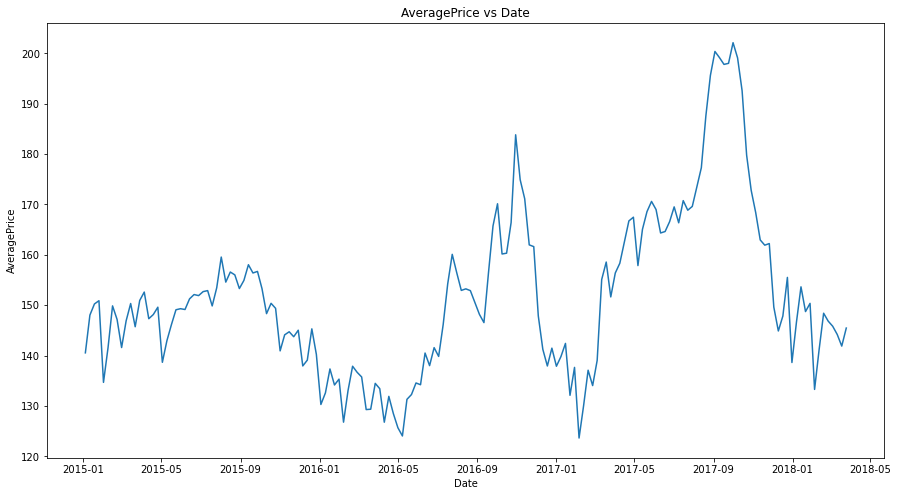

In [28]:
color1 = ['#296C92','#3EB489']

plt.figure(figsize=(15,8))
sns.lineplot(x = df1.index ,y = 'AveragePrice',data = df1,palette = color1);
plt.title('AveragePrice vs Date')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


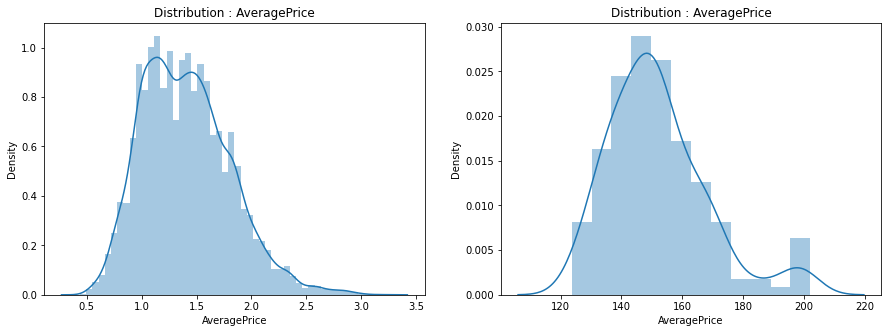

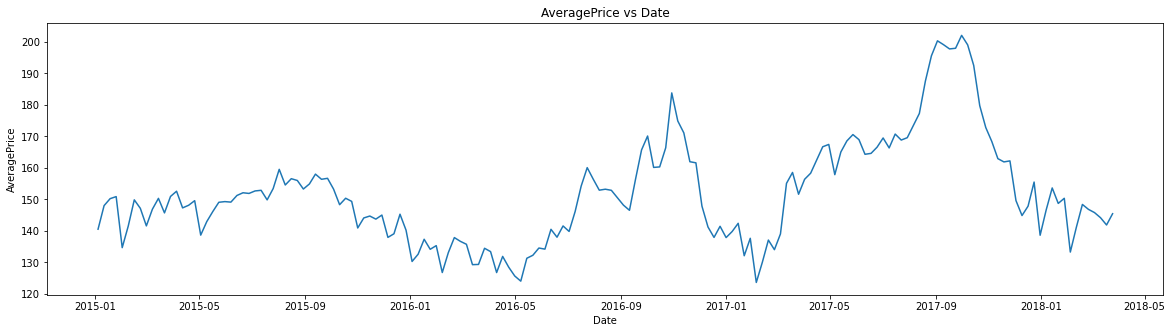

In [29]:
color1 = ['#296C92','#3EB489']
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(data['AveragePrice']);
plt.title('Distribution : AveragePrice')

plt.subplot(1,2,2)
sns.distplot(df1['AveragePrice']);
plt.title('Distribution : AveragePrice')

fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (20,5))
plt.subplot(1,1,1)
sns.lineplot(x = df1.index ,y = 'AveragePrice',data = df1,palette = color1);
plt.title('AveragePrice vs Date')

plt.show()
fig.tight_layout(pad = 2)

In [30]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

numerical_features.remove('Date')
numerical_features.remove('AveragePrice')
numerical_features.remove('region')
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : type year
Numerical Features : Total Volume 4046 4225 4770 Total Bags Small Bags Large Bags XLarge Bags


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['type'] = le.fit_transform(data['type'])

In [32]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,Albany


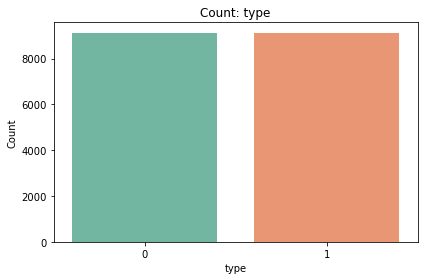

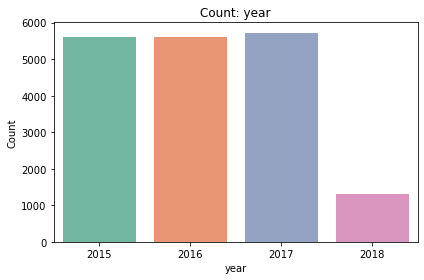

In [33]:
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[col], palette='Set2')
    plt.title(f'Count: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


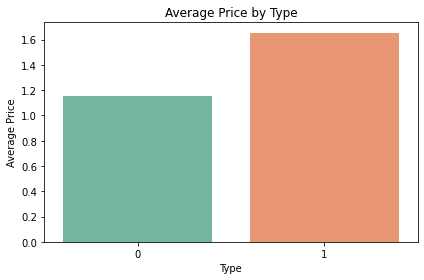

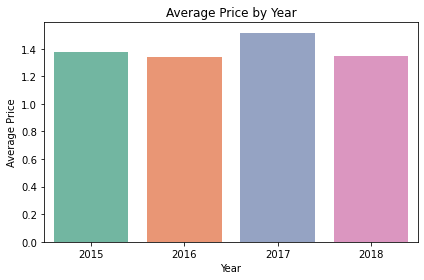

In [34]:

# Plot 1: AveragePrice by type
plt.figure(figsize=(6, 4))
sns.barplot(x='type', y='AveragePrice', data=data, palette='Set2',ci=None)
plt.title('Average Price by Type')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

# Plot 2: AveragePrice by year
plt.figure(figsize=(6, 4))
sns.barplot(x='year', y='AveragePrice', data=data, palette='Set2',ci=None)
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

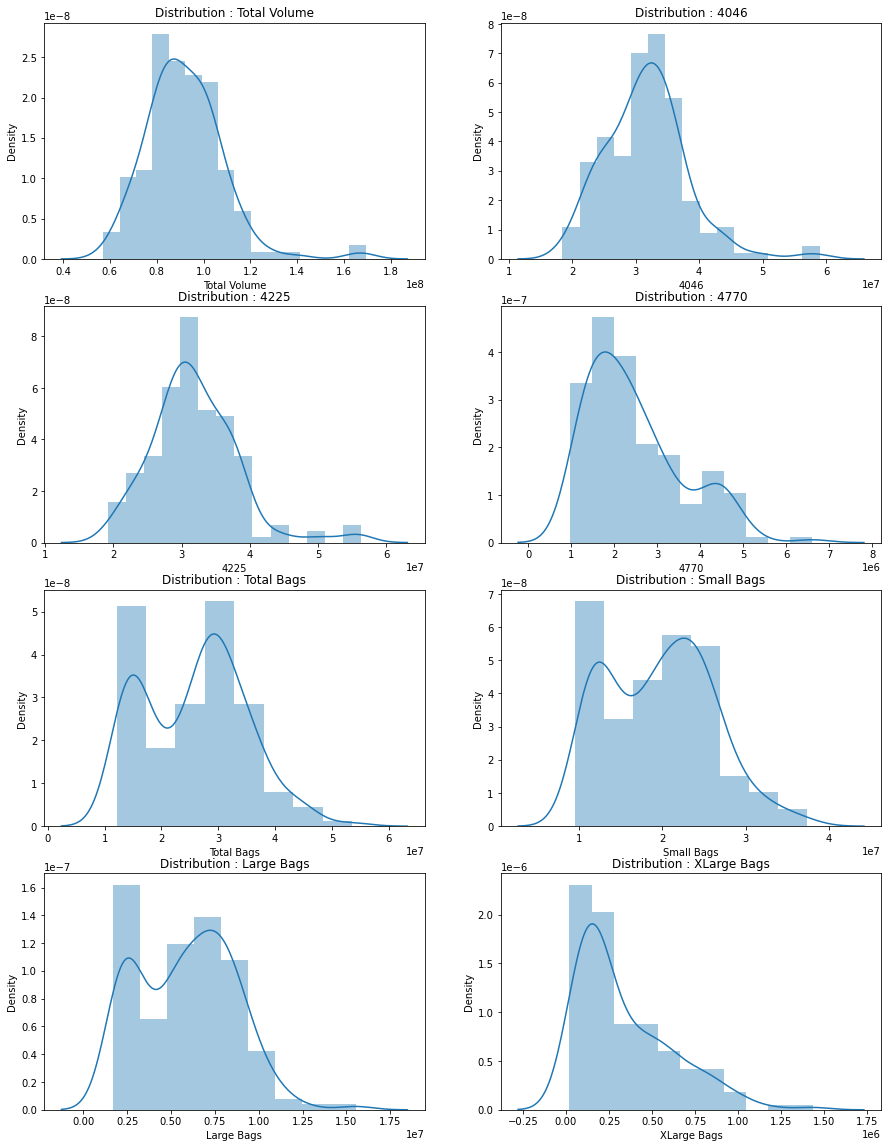

In [36]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for i in range(len(numerical_features)):
    plt.subplot(4, 2, i+1)
    sns.distplot(df1[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)

plt.show()
fig.tight_layout(h_pad=10, w_pad=5)


In [37]:
total_volume = [sum(data[data['type'] == 0]['Total Volume']) / sum(data['Total Volume']) * 100,
                sum(data[data['type'] == 1]['Total Volume']) / sum(data['Total Volume']) * 100]

avocado_4046 = [sum(data[data['type'] == 0]['4046']) / sum(data['4046']) * 100,
                sum(data[data['type'] == 1]['4046']) / sum(data['4046']) * 100]

avocado_4225 = [sum(data[data['type'] == 0]['4225']) / sum(data['4225']) * 100,
                sum(data[data['type'] == 1]['4225']) / sum(data['4225']) * 100]

avocado_4770 = [sum(data[data['type'] == 0]['4770']) / sum(data['4770']) * 100,
                sum(data[data['type'] == 1]['4770']) / sum(data['4770']) * 100]

total_bags = [sum(data[data['type'] == 0]['Total Bags']) / sum(data['Total Bags']) * 100,
              sum(data[data['type'] == 1]['Total Bags']) / sum(data['Total Bags']) * 100]

small_bags = [sum(data[data['type'] == 0]['Small Bags']) / sum(data['Small Bags']) * 100,
              sum(data[data['type'] == 1]['Small Bags']) / sum(data['Small Bags']) * 100]

large_bags = [sum(data[data['type'] == 0]['Large Bags']) / sum(data['Large Bags']) * 100,
              sum(data[data['type'] == 1]['Large Bags']) / sum(data['Large Bags']) * 100]

xlarge_bags = [sum(data[data['type'] == 0]['XLarge Bags']) / sum(data['XLarge Bags']) * 100,
               sum(data[data['type'] == 1]['XLarge Bags']) / sum(data['XLarge Bags']) * 100]

type_numerical_features_percentage = [total_volume,avocado_4046,avocado_4225,avocado_4770,
                          total_bags,small_bags,large_bags,xlarge_bags]

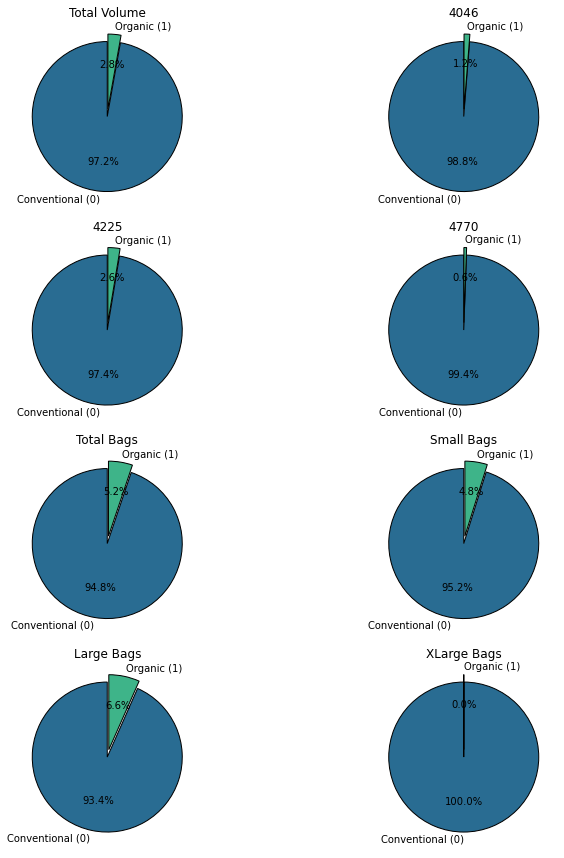

In [38]:
fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (12,12))

for i in range(len(numerical_features)):
    plt.subplot(4,2,i + 1)
    plt.pie(type_numerical_features_percentage[i],labels = ['Conventional (0)','Organic (1)'],autopct = '%1.1f%%',
            startangle = 90, explode = (0,0.1), colors = color1, 
            wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    title = numerical_features[i]
    plt.title(title);
        
fig.tight_layout(pad = 1)

In [39]:
total_volume = [sum(data[data['year'] == 2015]['Total Volume']) / sum(data['Total Volume']) * 100,
                sum(data[data['year'] == 2016]['Total Volume']) / sum(data['Total Volume']) * 100,
                sum(data[data['year'] == 2017]['Total Volume']) / sum(data['Total Volume']) * 100,
                sum(data[data['year'] == 2018]['Total Volume']) / sum(data['Total Volume']) * 100]

avocado_4046 = [sum(data[data['year'] == 2015]['4046']) / sum(data['4046']) * 100,
                sum(data[data['year'] == 2016]['4046']) / sum(data['4046']) * 100,
                sum(data[data['year'] == 2017]['4046']) / sum(data['4046']) * 100,
                sum(data[data['year'] == 2018]['4046']) / sum(data['4046']) * 100]

avocado_4225 = [sum(data[data['year'] == 2015]['4225']) / sum(data['4225']) * 100,
                sum(data[data['year'] == 2016]['4225']) / sum(data['4225']) * 100,
                sum(data[data['year'] == 2017]['4225']) / sum(data['4225']) * 100,
                sum(data[data['year'] == 2018]['4225']) / sum(data['4225']) * 100]

avocado_4770 = [sum(data[data['year'] == 2015]['4770']) / sum(data['4770']) * 100,
                sum(data[data['year'] == 2016]['4770']) / sum(data['4770']) * 100,
                sum(data[data['year'] == 2017]['4770']) / sum(data['4770']) * 100,
                sum(data[data['year'] == 2018]['4770']) / sum(data['4770']) * 100]

total_bags = [sum(data[data['year'] == 2015]['Total Bags']) / sum(data['Total Bags']) * 100,
              sum(data[data['year'] == 2016]['Total Bags']) / sum(data['Total Bags']) * 100,
              sum(data[data['year'] == 2017]['Total Bags']) / sum(data['Total Bags']) * 100,
              sum(data[data['year'] == 2018]['Total Bags']) / sum(data['Total Bags']) * 100]

small_bags = [sum(data[data['year'] == 2015]['Small Bags']) / sum(data['Small Bags']) * 100,
              sum(data[data['year'] == 2016]['Small Bags']) / sum(data['Small Bags']) * 100,
              sum(data[data['year'] == 2017]['Small Bags']) / sum(data['Small Bags']) * 100,
              sum(data[data['year'] == 2018]['Small Bags']) / sum(data['Small Bags']) * 100]

large_bags = [sum(data[data['year'] == 2015]['Large Bags']) / sum(data['Large Bags']) * 100,
              sum(data[data['year'] == 2016]['Large Bags']) / sum(data['Large Bags']) * 100,
              sum(data[data['year'] == 2017]['Large Bags']) / sum(data['Large Bags']) * 100,
              sum(data[data['year'] == 2018]['Large Bags']) / sum(data['Large Bags']) * 100]

xlarge_bags = [sum(data[data['year'] == 2015]['XLarge Bags']) / sum(data['XLarge Bags']) * 100,
               sum(data[data['year'] == 2016]['XLarge Bags']) / sum(data['XLarge Bags']) * 100,
               sum(data[data['year'] == 2017]['XLarge Bags']) / sum(data['XLarge Bags']) * 100,
               sum(data[data['year'] == 2018]['XLarge Bags']) / sum(data['XLarge Bags']) * 100]

year_numerical_features_percentage = [total_volume,avocado_4046,avocado_4225,avocado_4770,
                                      total_bags,small_bags,large_bags,xlarge_bags]

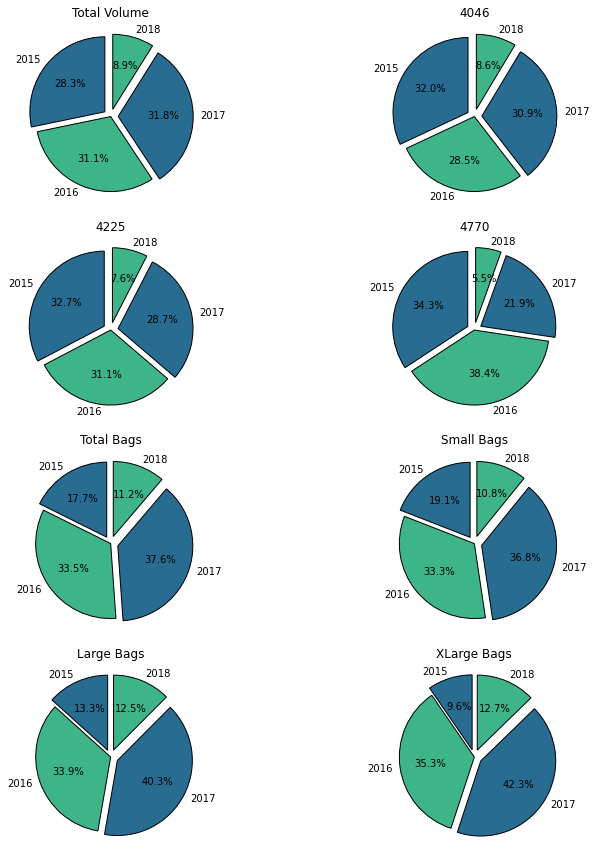

In [40]:
fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (12,12))

for i in range(len(numerical_features)):
    plt.subplot(4,2,i + 1)
    plt.pie(year_numerical_features_percentage[i],labels = ['2015','2016','2017','2018'],autopct = '%1.1f%%',
            startangle = 90, explode = (0.1,0,0.1,0.1), colors = color1, 
            wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    title = numerical_features[i] 
    plt.title(title);
fig.tight_layout(pad = 1)

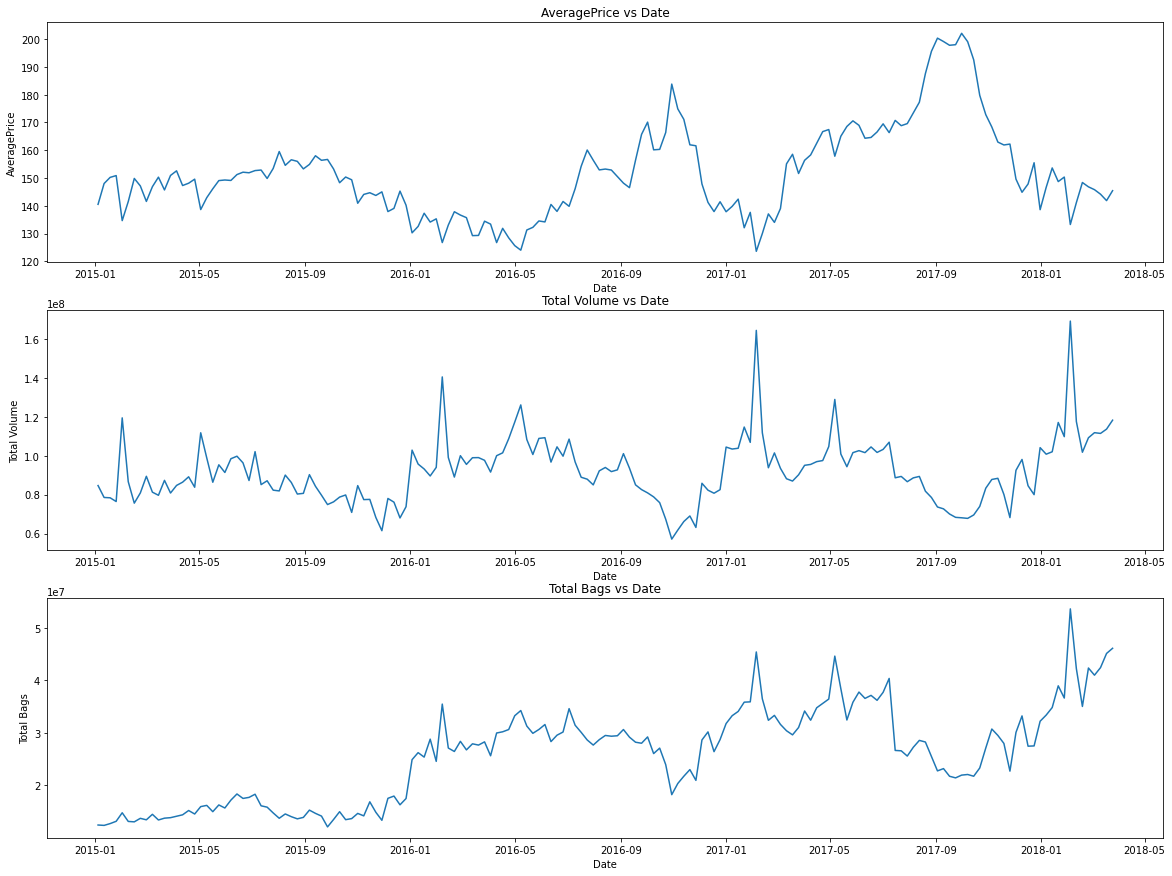

In [41]:
l1 = ['AveragePrice','Total Volume','Total Bags']
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (20,15))
for i in range(len(l1)):
    
    plt.subplot(3,1,i+1)
    sns.lineplot(x = df1.index,y = l1[i],data = df1)
    title = l1[i] + ' vs Date'
    plt.title(title);

In [42]:
"""we can see that total bags and total volume have a direct proportional relation wheras both are inversly proportional to 
average price. 
This relationship between AveragePrice vs Total Volume & Total Bags w.r.t Date can be associated with the Law of Supply and Demand.

If the supply increases and demand stays the same, the price will go down.
If the supply decreases and demand stays the same, the price will go up.
"""

'we can see that total bags and total volume have a direct proportional relation wheras both are inversly proportional to \naverage price. \nThis relationship between AveragePrice vs Total Volume & Total Bags w.r.t Date can be associated with the Law of Supply and Demand.\n\nIf the supply increases and demand stays the same, the price will go down.\nIf the supply decreases and demand stays the same, the price will go up.\n'

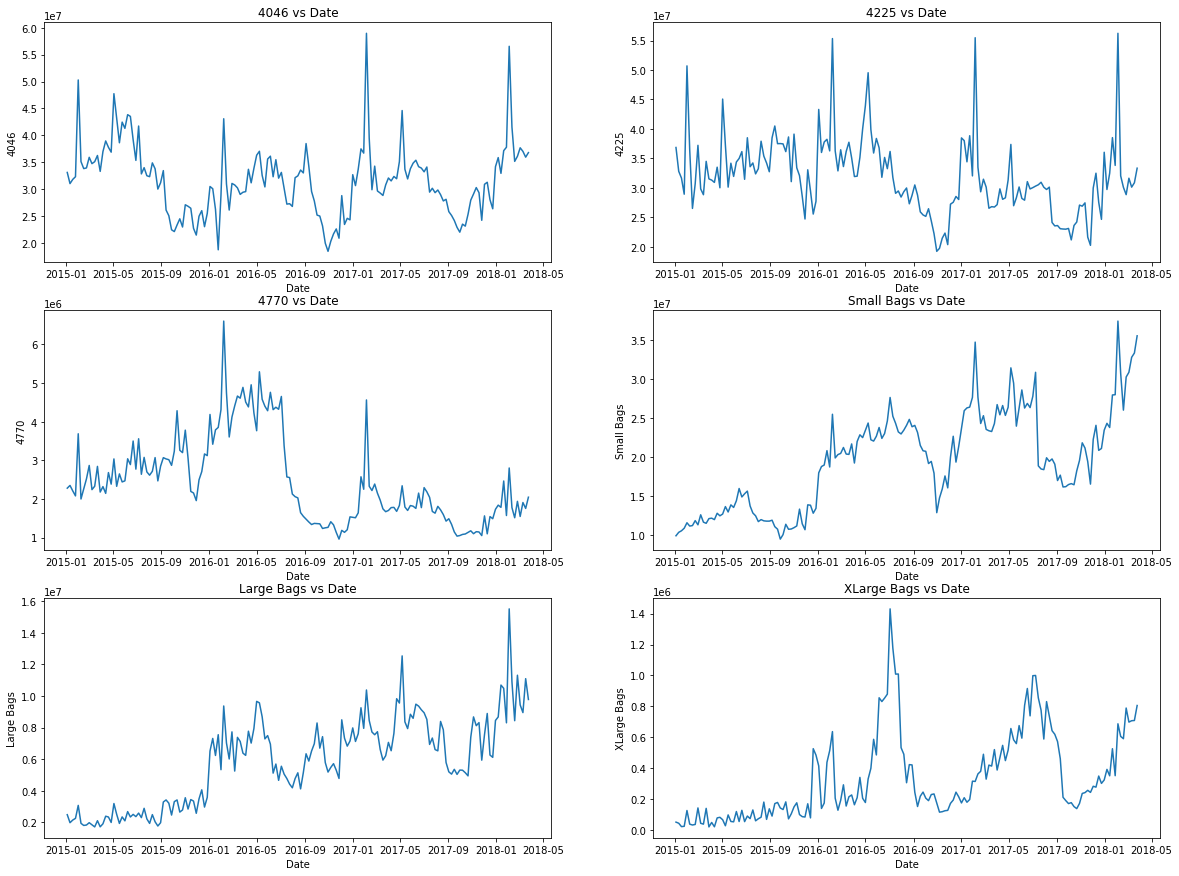

In [43]:
l2 = ['4046','4225','4770','Small Bags','Large Bags','XLarge Bags']

fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (20,15))
for i in range(len(l2)):
    
    plt.subplot(3,2,i+1)
    sns.lineplot(x = df1.index,y = l2[i],data = df1)
    title = l2[i] + ' vs Date'
    plt.title(title);

In [44]:
"""Avocados with PLU (Product Lookup Code) 4046 and 4225 kind of display the same patterns w.r.t Date. Crests and troughs 
are very similar to each other. 4770 type of avocado has a seen a decrease in it's demand as time progresses. 
It has encountered a sharp drop in demand during the later months of 2016 and has not recovered since then.
Use of bags w.r.t avocados has definitely been on the up! All the bags display a rising graph w.r.t Date. 
From the values present on y-axis, customers prefer to use the Small Bags."""

"Avocados with PLU (Product Lookup Code) 4046 and 4225 kind of display the same patterns w.r.t Date. Crests and troughs \nare very similar to each other. 4770 type of avocado has a seen a decrease in it's demand as time progresses. \nIt has encountered a sharp drop in demand during the later months of 2016 and has not recovered since then.\nUse of bags w.r.t avocados has definitely been on the up! All the bags display a rising graph w.r.t Date. \nFrom the values present on y-axis, customers prefer to use the Small Bags."

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


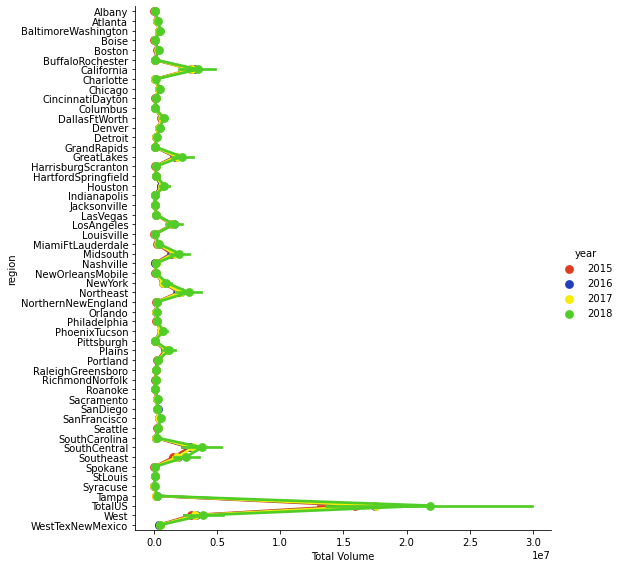

In [45]:
color2 = ['#DF3C22','#203EB9', '#F5EE04','#50CD27']

sns.catplot('Total Volume','region',data = data,hue = 'year',height = 8,palette = color2,kind = 'point');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


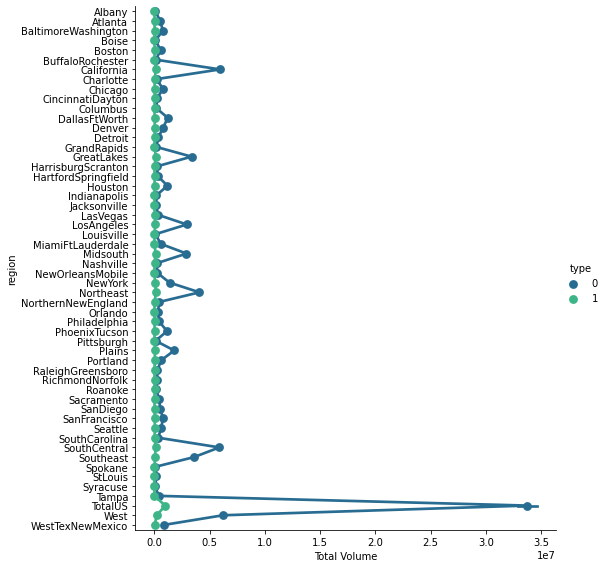

In [305]:
sns.catplot('Total Volume','region',data = data,hue = 'type',height = 8,palette = color1,kind = 'point');

In [306]:
"""
Both are highly correlated

"""

'\nBoth are highly correlated\n\n'

In [307]:
df1 = data.copy(deep = True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace = True)
df1 = df1.resample('W').sum()
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
Date,,,,,,,,,,,
2015-01-04,140.54,84674337.20,33098258.74,36851038.43,2278818.64,12446221.39,9910008.90,2485655.90,50556.59,54,217620
2015-01-11,148.03,78555807.24,31024164.99,32808429.84,2349167.45,12374044.96,10352936.42,1977832.00,43276.54,54,217620
2015-01-18,150.24,78388784.08,31802706.86,31662041.93,2208250.55,12715784.74,10548854.11,2145586.13,21344.50,54,217620
2015-01-25,150.89,76466281.07,32305132.87,28929122.37,2078378.86,13153646.97,10877316.95,2252815.92,23514.10,54,217620
2015-02-01,134.68,119453235.25,50292988.96,50696230.48,3687489.31,14776526.50,11576833.65,3073989.39,125703.46,54,217620


In [308]:
l3 = list(df1.columns)
l3.remove('AveragePrice')

df1.drop(columns = l3,inplace =True)
df1.head()

,AveragePrice
Date,
2015-01-04,140.54
2015-01-11,148.03
2015-01-18,150.24
2015-01-25,150.89
2015-02-01,134.68


In [309]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window = 12).mean()
    MSTD = timeseries.rolling(window = 12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


In [310]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

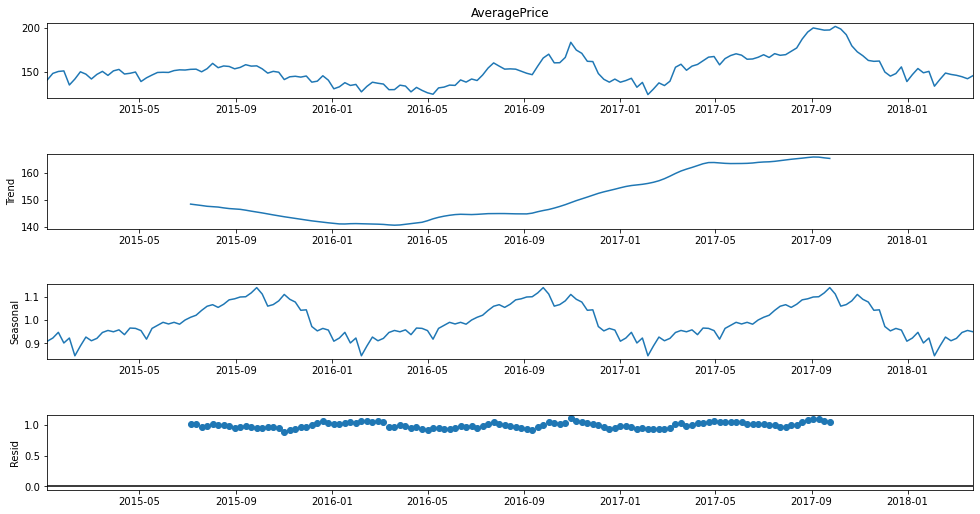

In [311]:
dec = sm.tsa.seasonal_decompose(df1['AveragePrice'], model = 'multiplicative').plot()
dec.set_size_inches(15,8)
plt.show();

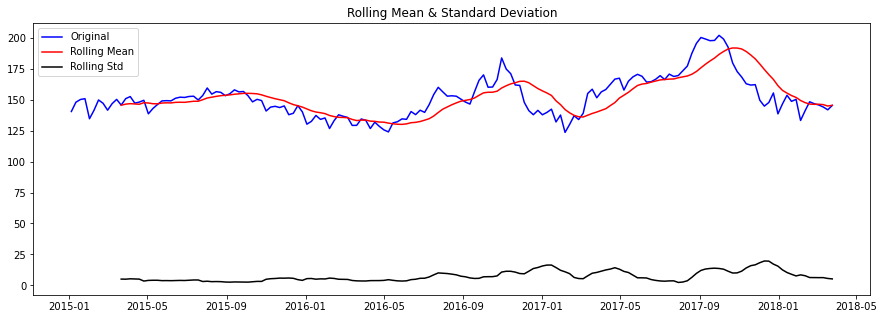

Results of Dickey-Fuller Test:
Test Statistic                 -2.36
p-value                         0.15
#Lags Used                      0.00
Number of Observations Used   168.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


In [312]:
test_stationarity(df1['AveragePrice'])

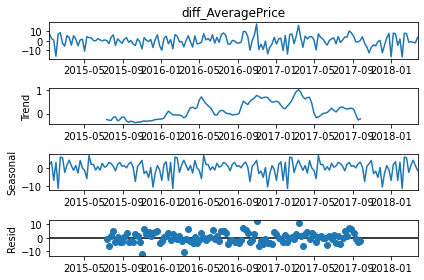

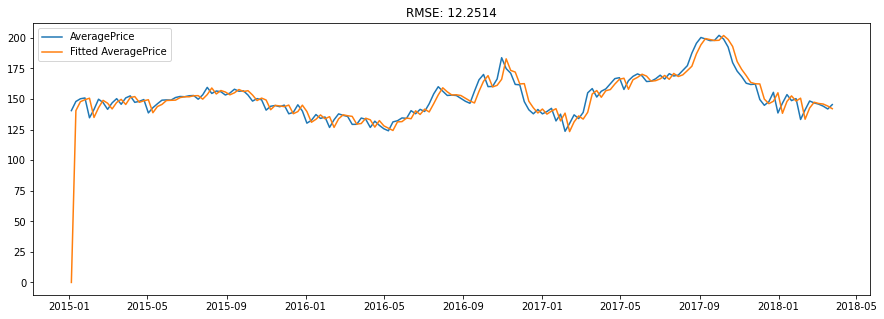

In [317]:
# Simple differencing instead of log differencing
df1['diff_AveragePrice'] = df1['AveragePrice'].diff()
df1_diff = df1['diff_AveragePrice'].dropna()

# Seasonal decomposition on the simple differenced series
dec = sm.tsa.seasonal_decompose(df1_diff, period=52).plot()
plt.show()

# For your ARIMA modeling, update this section:
model = ARIMA(df1['AveragePrice'], order=(1, 1, 2))  # Use original AveragePrice
model_fit = model.fit()

# Get fitted values directly (no need for complex transformation)
predictions_ARIMA = pd.Series(model_fit.fittedvalues, copy=True)

# Plot results
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
plt.plot(df1['AveragePrice'], label='AveragePrice')
plt.plot(predictions_ARIMA, label='Fitted AveragePrice')
plt.legend(loc="upper left")
plt.title('RMSE: %.4f' % np.sqrt(sum((predictions_ARIMA - df1['AveragePrice'])**2)/len(df1['AveragePrice'])))
plt.show()

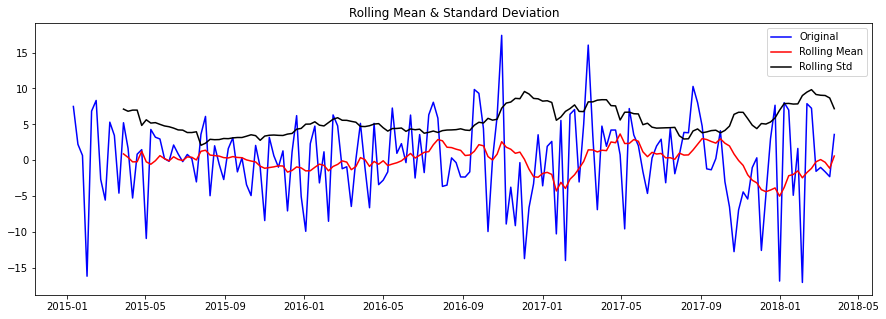

Results of Dickey-Fuller Test:
Test Statistic                -13.20
p-value                         0.00
#Lags Used                      0.00
Number of Observations Used   167.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


In [318]:
test_stationarity(df1_diff)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


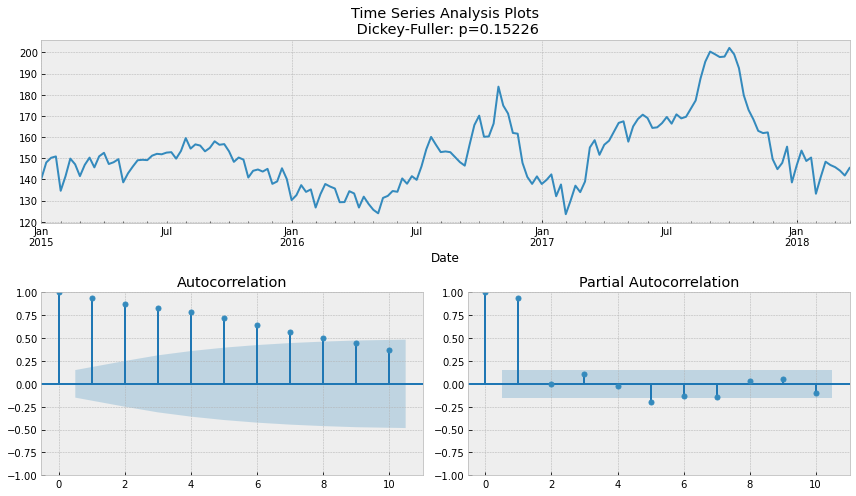

In [319]:
tsplot(df1['AveragePrice'],lags = 10)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


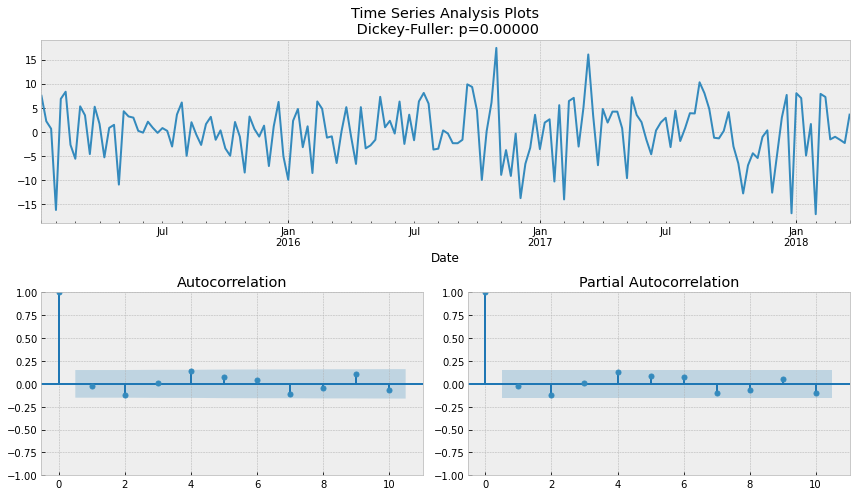

In [320]:
tsplot(df1_diff,lags = 10)

In [321]:
model = ARIMA(df1['diff_AveragePrice'],order = (1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      diff_AveragePrice   No. Observations:                  169
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -541.850
Date:                Tue, 20 May 2025   AIC                           1091.701
Time:                        14:33:45   BIC                           1104.197
Sample:                    01-04-2015   HQIC                          1096.772
                         - 03-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8495      0.621     -1.368      0.171      -2.067       0.368
ma.L1         -0.1357      5.837     -0.023      0.981     -11.575      11.304
ma.L2         -0.8642      5.125     -0.169      0.8

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


C:\Users\91974\AppData\Local\Temp\ipykernel_4488\1760071019.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_ARIMA_final = predictions_ARIMA_final.append(


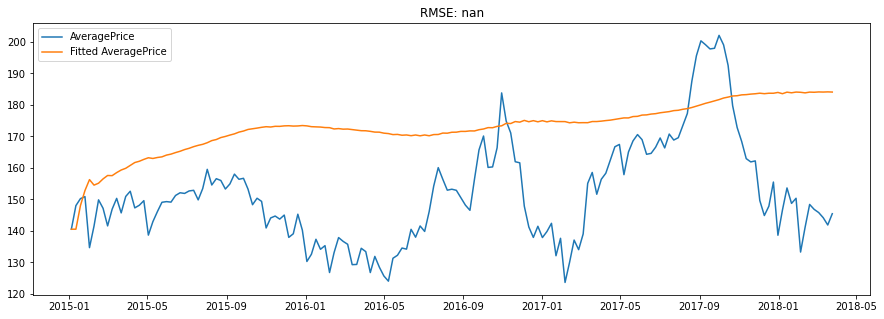

In [322]:
# Fitted values of the model
predictions_ARIMA = pd.Series(model_fit.fittedvalues, copy=True)

# Reversing the 1st order Differencing by taking cumulative sum 
predictions_ARIMA_cumsum = predictions_ARIMA.cumsum()

# Add the first value of the original series to make the levels match
first_value = df1['AveragePrice'].iloc[0]
predictions_ARIMA_final = pd.Series(first_value, index=df1.index[0:1])

# Add the cumulative sum to the first value
predictions_ARIMA_final = predictions_ARIMA_final.append(
    pd.Series(first_value + predictions_ARIMA_cumsum.values, 
              index=predictions_ARIMA_cumsum.index))

# Plot results
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
plt.plot(df1['AveragePrice'], label='AveragePrice')
plt.plot(predictions_ARIMA_final, label='Fitted AveragePrice')
plt.legend(loc="upper left")
plt.title('RMSE: %.4f' % np.sqrt(sum((predictions_ARIMA_final.iloc[1:] - df1['AveragePrice'].iloc[1:])**2)/len(df1['AveragePrice'].iloc[1:])))
plt.show()

In [324]:
size = int(len(df1) - 30)
train, test = df1['AveragePrice'][0:size], df1['AveragePrice'][size:len(df1)]

print('\t ARIMA MODEL : In - Sample Forecasting \n')

history = [x for x in train]
predictions = []

for t in range(len(test)):
    
    model = ARIMA(history, order=(1,1,2))
    # Remove the 'disp' parameter that's causing the error
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat, obs))

	 ARIMA MODEL : In - Sample Forecasting 

predicted = 193.947891, expected = 200.360000
predicted = 199.235501, expected = 199.140000
predicted = 198.436364, expected = 197.790000
predicted = 197.778454, expected = 198.000000
predicted = 198.063402, expected = 202.100000
predicted = 201.991895, expected = 199.080000
predicted = 198.710629, expected = 192.550000
predicted = 192.983941, expected = 179.770000
predicted = 180.460441, expected = 172.820000
predicted = 173.991808, expected = 168.380000
predicted = 168.919999, expected = 162.950000
predicted = 163.151366, expected = 161.910000
predicted = 162.314318, expected = 162.230000
predicted = 162.341431, expected = 149.620000
predicted = 149.106758, expected = 144.880000
predicted = 145.556756, expected = 147.850000
predicted = 148.286146, expected = 155.510000
predicted = 155.745776, expected = 138.620000
predicted = 137.556236, expected = 146.640000
predicted = 147.860356, expected = 153.640000
predicted = 152.863895, expected = 148

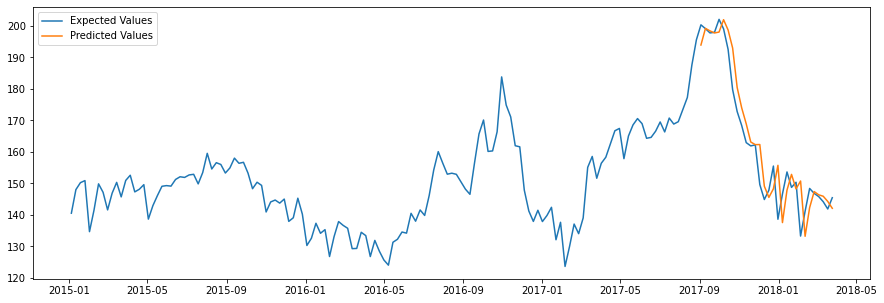

In [326]:
predictions_series = pd.Series(predictions, index=test.index)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
plt.subplot(1,1,1)
plt.plot(df1['AveragePrice'], label='Expected Values')
# Remove the np.exp() function since your predictions are already in the original scale
plt.plot(predictions_series, label='Predicted Values')
plt.legend(loc="upper left")
plt.show()

In [328]:
error = np.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.4f' % error)
predictions_series = pd.Series(predictions, index = test.index)

Test RMSE: 7.0721


In [329]:
from pandas.tseries.offsets import DateOffset
future_dates = [df1.index[-1] + DateOffset(weeks = x) for x in range(0,52)]

# New dataframe for storing the future values
df2 = pd.DataFrame(index = future_dates[1:],columns = df1.columns)

forecast = pd.concat([df1,df2])
forecast['ARIMA_Forecast_Function'] = np.NaN
forecast['ARIMA_Predict_Function'] = np.NaN
forecast.head()

,AveragePrice,diff_AveragePrice,ARIMA_Forecast_Function,ARIMA_Predict_Function
2015-01-04,140.54,NaN,NaN,NaN
2015-01-11,148.03,7.49,NaN,NaN
2015-01-18,150.24,2.21,NaN,NaN
2015-01-25,150.89,0.65,NaN,NaN
2015-02-01,134.68,-16.21,NaN,NaN


In [332]:
# Get forecast values - in newer statsmodels versions, forecast returns a different structure
forecast_result = model_fit.forecast(steps=51)

# Check what's returned by forecast to adapt your code
if isinstance(forecast_result, tuple):
    # Older statsmodels versions returned a tuple
    f1 = np.array(forecast_result[0])
else:
    # Newer versions return a Series or array directly
    f1 = np.array(forecast_result)

# Now use the forecast values
for i in range(len(f1)):
    forecast.iloc[169 + i, 2] = f1[i]
    
forecast.tail()

,AveragePrice,diff_AveragePrice,ARIMA_Forecast_Function,ARIMA_Predict_Function
2019-02-17,NaN,NaN,142.30,NaN
2019-02-24,NaN,NaN,142.30,NaN
2019-03-03,NaN,NaN,142.30,NaN
2019-03-10,NaN,NaN,142.30,NaN
2019-03-17,NaN,NaN,142.30,NaN


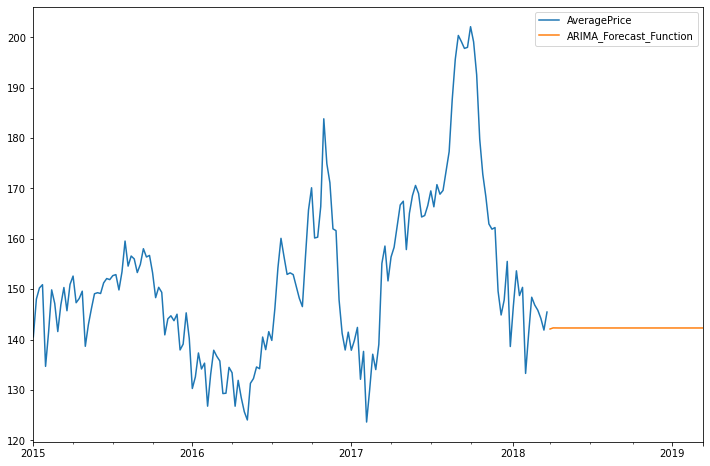

In [333]:
forecast[['AveragePrice','ARIMA_Forecast_Function']].plot(figsize = (12,8));

In [335]:
f2 = np.array(model_fit.predict(start = 169,end = 219,typ = 'levels'))

for i in range(51):
    forecast.iloc[169 + i,3] = f2[i]
forecast.tail()

,AveragePrice,diff_AveragePrice,ARIMA_Forecast_Function,ARIMA_Predict_Function
2019-02-17,NaN,NaN,142.30,142.30
2019-02-24,NaN,NaN,142.30,142.30
2019-03-03,NaN,NaN,142.30,142.30
2019-03-10,NaN,NaN,142.30,142.30
2019-03-17,NaN,NaN,142.30,142.30


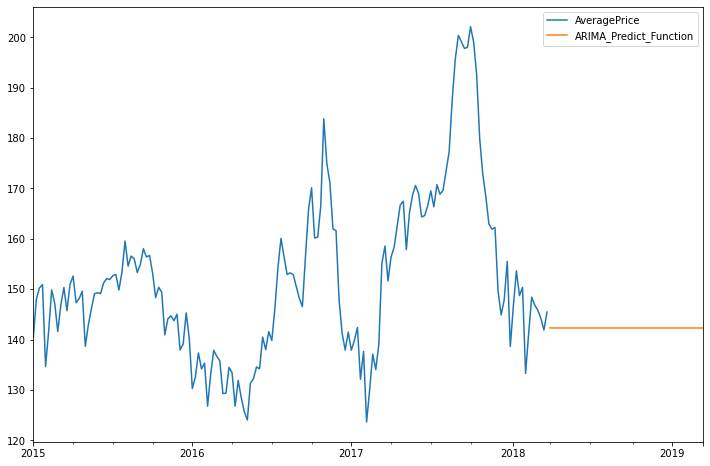

In [336]:
forecast[['AveragePrice','ARIMA_Predict_Function']].plot(figsize = (12,8));

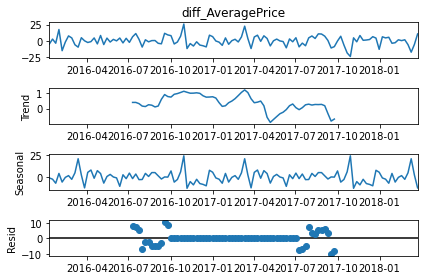

In [340]:
df1_diff_seas = df1_diff.diff(52)
df1_diff_seas = df1_diff_seas.dropna()
dec = sm.tsa.seasonal_decompose(df1_diff_seas).plot()
plt.show()

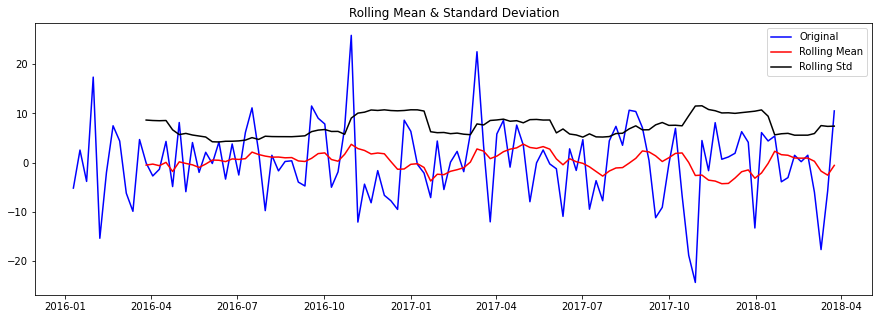

Results of Dickey-Fuller Test:
Test Statistic                 -4.70
p-value                         0.00
#Lags Used                     11.00
Number of Observations Used   104.00
Critical Value (1%)            -3.49
Critical Value (5%)            -2.89
Critical Value (10%)           -2.58
dtype: float64


In [359]:
test_stationarity(df1_diff_seas)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


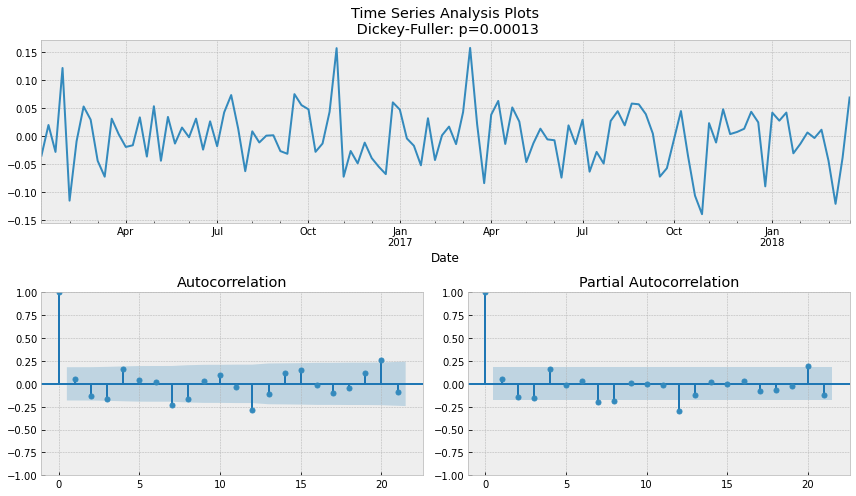

In [342]:
tsplot(df1_log_diff_seas)

In [343]:
model = sm.tsa.statespace.SARIMAX(df1['diff_AveragePrice'],order = (1,1,2),seasonal_order = (0,1,0,52))
model_fit = model.fit()
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                   diff_AveragePrice   No. Observations:                  169
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 52)   Log Likelihood                -407.221
Date:                             Tue, 20 May 2025   AIC                            822.443
Time:                                     14:48:24   BIC                            833.457
Sample:                                 01-04-2015   HQIC                           826.914
                                      - 03-25-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1258      0.847     -0.149      0.882      -1.785       1.534
ma.L1         -0.7559      

In [348]:
import statsmodels.api as sm
import numpy as np

# Use actual AveragePrice data (not differenced manually)
size = int(len(df1) - 30)
train, test = df1['AveragePrice'][0:size], df1['AveragePrice'][size:]

print('\t SARIMA MODEL : In-Sample Forecasting with Normal Differencing \n')

history = [x for x in train]
predictions = []

for t in range(len(test)):
    # SARIMA with model-internal differencing (d=1, D=1)
    model = sm.tsa.statespace.SARIMAX(history, order=(1,1,2), seasonal_order=(0,1,0,52))
    model_fit = model.fit(disp=0)

    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)

    obs = test[t]
    history.append(obs)

    print('predicted = %f, expected = %f' % (yhat, obs))


	 SARIMA MODEL : In-Sample Forecasting with Normal Differencing 

predicted = 191.539800, expected = 200.360000
predicted = 197.175492, expected = 199.140000
predicted = 207.843730, expected = 197.790000
predicted = 204.797908, expected = 198.000000
predicted = 201.411380, expected = 202.100000
predicted = 192.153933, expected = 199.080000
predicted = 199.222385, expected = 192.550000
predicted = 197.804694, expected = 179.770000
predicted = 197.010955, expected = 172.820000
predicted = 163.668598, expected = 168.380000
predicted = 169.538922, expected = 162.950000
predicted = 156.054549, expected = 161.910000
predicted = 165.068513, expected = 162.230000
predicted = 150.211971, expected = 149.620000
predicted = 144.813764, expected = 144.880000
predicted = 143.183709, expected = 147.850000
predicted = 153.023455, expected = 155.510000
predicted = 152.660811, expected = 138.620000
predicted = 139.959274, expected = 146.640000
predicted = 151.299208, expected = 153.640000
predicted = 14

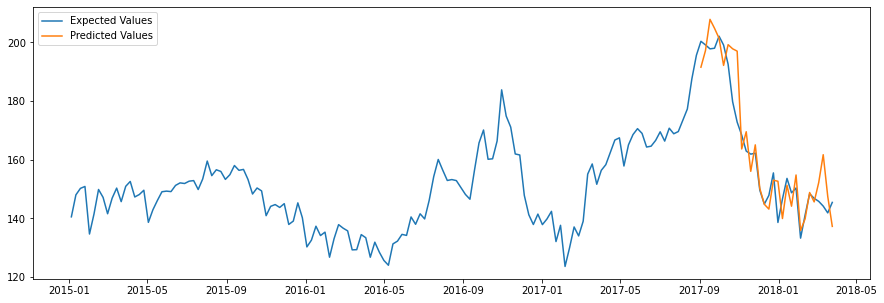

In [350]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(df1['AveragePrice'],label = 'Expected Values')
plt.plot(predictions_series,label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [351]:
error = np.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.4f' % error)
predictions_series = pd.Series(predictions, index = test.index)

Test RMSE: 8.3909


In [352]:
forecast['SARIMA_Forecast_Function'] = np.NaN
forecast['SARIMA_Predict_Function'] = np.NaN
forecast.head()

,AveragePrice,diff_AveragePrice,ARIMA_Forecast_Function,ARIMA_Predict_Function,SARIMA_Forecast_Function,SARIMA_Predict_Function
2015-01-04,140.54,NaN,NaN,NaN,NaN,NaN
2015-01-11,148.03,7.49,NaN,NaN,NaN,NaN
2015-01-18,150.24,2.21,NaN,NaN,NaN,NaN
2015-01-25,150.89,0.65,NaN,NaN,NaN,NaN
2015-02-01,134.68,-16.21,NaN,NaN,NaN,NaN


In [353]:
f3 = np.array(model_fit.forecast(steps = 51))

for i in range(len(f3)):
    forecast.iloc[169 + i,4] = f3[i]
forecast.tail()

,AveragePrice,diff_AveragePrice,ARIMA_Forecast_Function,ARIMA_Predict_Function,SARIMA_Forecast_Function,SARIMA_Predict_Function
2019-02-17,NaN,NaN,142.30,142.30,141.53,NaN
2019-02-24,NaN,NaN,142.30,142.30,148.77,NaN
2019-03-03,NaN,NaN,142.30,142.30,147.21,NaN
2019-03-10,NaN,NaN,142.30,142.30,146.19,NaN
2019-03-17,NaN,NaN,142.30,142.30,144.56,NaN


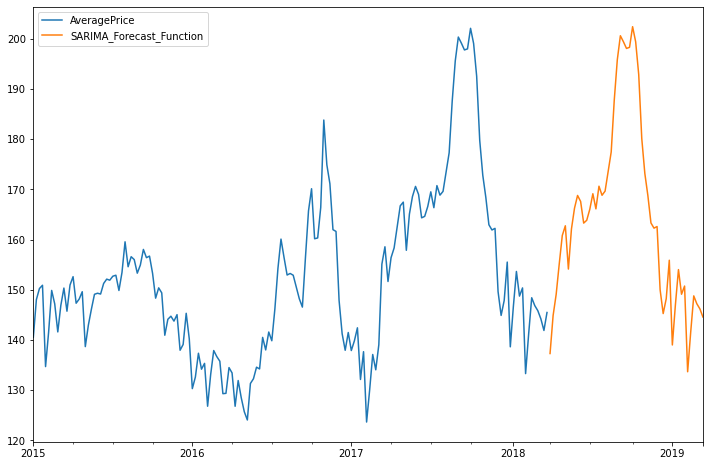

In [354]:
forecast[['AveragePrice','SARIMA_Forecast_Function']].plot(figsize = (12,8));

In [356]:
f4 = np.array(model_fit.predict(start = 169,end = 219,typ = 'levels'))

for i in range(51):
    forecast.iloc[169 + i,5] = f4[i]
forecast.tail()

,AveragePrice,diff_AveragePrice,ARIMA_Forecast_Function,ARIMA_Predict_Function,SARIMA_Forecast_Function,SARIMA_Predict_Function
2019-02-17,NaN,NaN,142.30,142.30,141.53,148.77
2019-02-24,NaN,NaN,142.30,142.30,148.77,147.21
2019-03-03,NaN,NaN,142.30,142.30,147.21,146.19
2019-03-10,NaN,NaN,142.30,142.30,146.19,144.56
2019-03-17,NaN,NaN,142.30,142.30,144.56,142.25


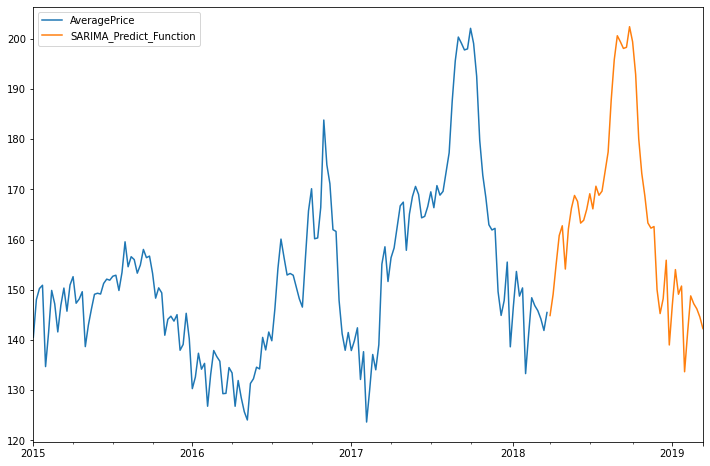

In [357]:
forecast[['AveragePrice','SARIMA_Predict_Function']].plot(figsize = (12,8));

In [358]:
df.tail()

,AveragePrice,Log_AveragePrice
Date,,
2018-02-25,146.84,4.99
2018-03-04,145.82,4.98
2018-03-11,144.19,4.97
2018-03-18,141.88,4.95
2018-03-25,145.46,4.98
